In [1]:
%load_ext autoreload
%autoreload 2

## Imports


In [2]:
import pandas as pd

import logging
import sys
import os
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

logger = logging.getLogger(__name__)
filename_ = os.path.basename(globals()["__vsc_ipynb_file__"])
logging.basicConfig(
    handlers=[
        logging.StreamHandler(sys.stdout),
        logging.FileHandler(filename="../logs/logs.log", mode="w"),
    ],
    level=logging.INFO,
    format=f"%(asctime)s - {filename_} - %(name)s - %(levelname)s - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
    force=True,
)

# Custom configs
from src.configs import config, config_test
from src.models import EnsembleModel

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine, load_breast_cancer, load_diabetes

# data = load_breast_cancer()
data = load_diabetes()
task = "regression"

In [3]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
logger.info("Data loaded")

2024-04-20 10:12:30 - v2.ipynb - __main__ - INFO - Data loaded


In [4]:
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y if task == "classification" else None,
)
X_val, X_test, y_val, y_test = train_test_split(
    X_val,
    y_val,
    test_size=0.5,
    random_state=42,
    stratify=y_val if task == "classification" else None,
)
sets_ = {"train": (X_train, y_train), "val": (X_val, y_val), "test": (X_test, y_test)}

logger.info(f"{X_train.shape=}, {X_val.shape=}, {X_test.shape=}")

2024-04-20 10:12:30 - v2.ipynb - __main__ - INFO - X_train.shape=(309, 10), X_val.shape=(66, 10), X_test.shape=(67, 10)


In [5]:
model = EnsembleModel(config=config, task=task, datasets_=sets_)

2024-04-20 10:12:30 - v2.ipynb - src.utils - INFO - Filling model parameters


2024-04-20 10:12:30 - v2.ipynb - src.utils - INFO - Model parameters filled


In [6]:
model.train()

2024-04-20 10:12:30 - v2.ipynb - src.models - INFO - Training ensemble
2024-04-20 10:12:30 - v2.ipynb - src.models - INFO - Training base models


2024-04-20 10:12:30 - v2.ipynb - src.models - INFO - xgboost trained
2024-04-20 10:12:30 - v2.ipynb - src.models - INFO - lightgbm trained
2024-04-20 10:12:30 - v2.ipynb - src.models - INFO - catboost trained
2024-04-20 10:12:30 - v2.ipynb - src.models - INFO - Getting meta features
2024-04-20 10:12:30 - v2.ipynb - src.models - INFO - train meta features created
2024-04-20 10:12:30 - v2.ipynb - src.models - INFO - val meta features created
2024-04-20 10:12:30 - v2.ipynb - src.models - INFO - test meta features created
2024-04-20 10:12:30 - v2.ipynb - src.models - INFO - Ensemble trained


2024-04-20 10:12:30 - v2.ipynb - src.utils - INFO - Evaluating model


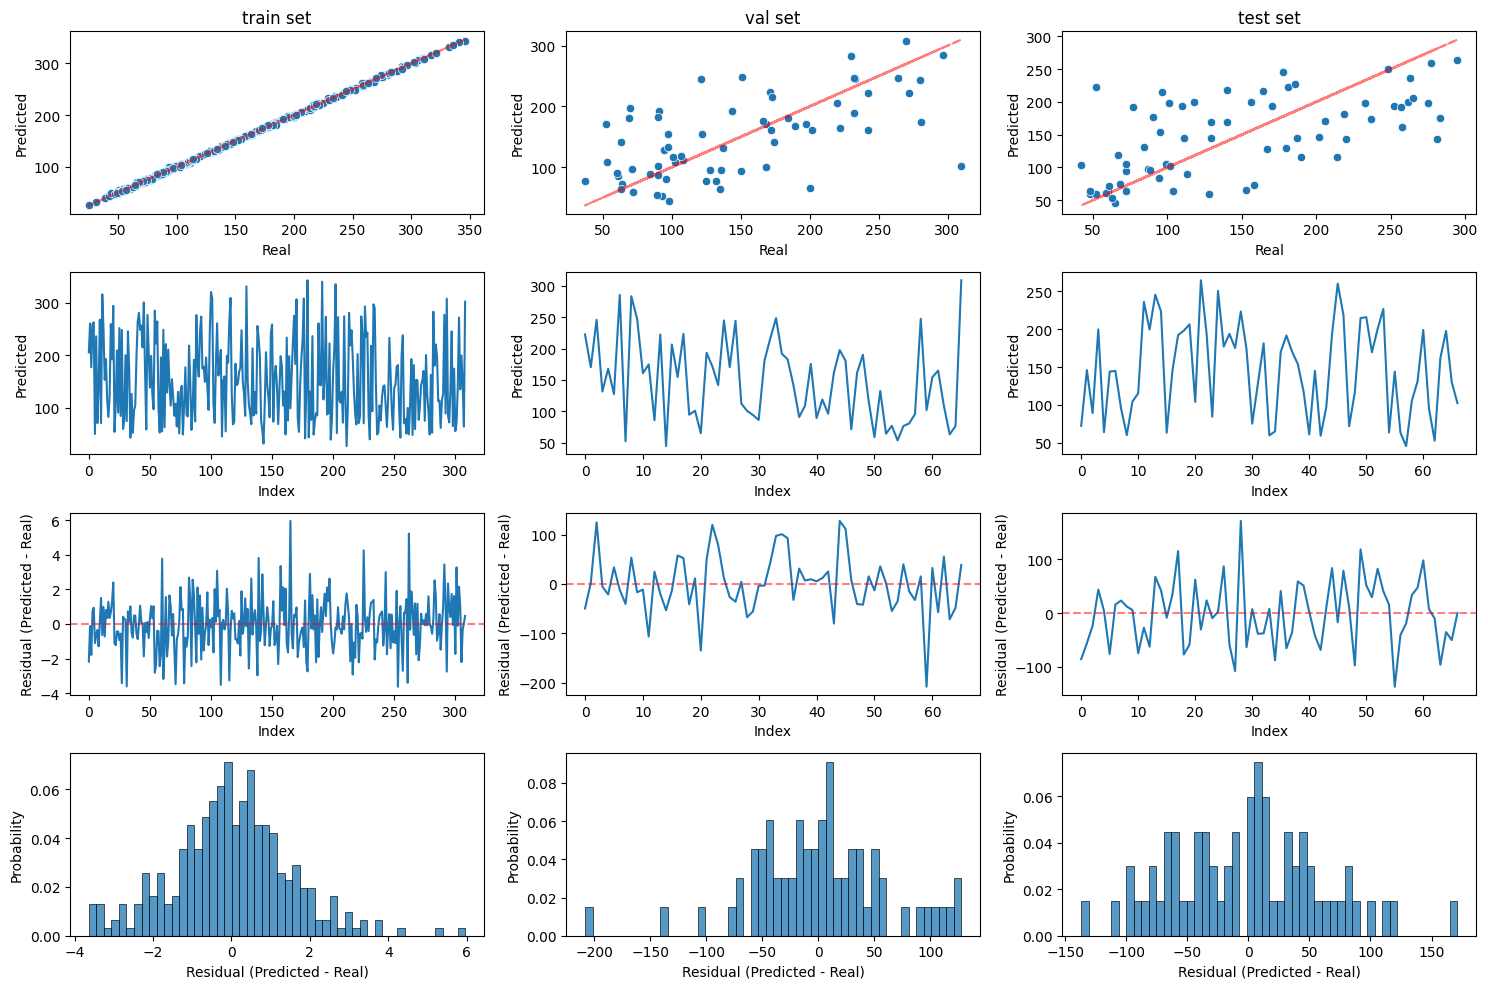

2024-04-20 10:12:31 - v2.ipynb - src.models - INFO - Model evaluation complete. Results saved in model.eval_results


In [7]:
model.evaluate()

In [8]:
model.evaluate(plot=False)

2024-04-20 10:12:32 - v2.ipynb - src.utils - INFO - Evaluating model


2024-04-20 10:12:32 - v2.ipynb - src.models - INFO - Model evaluation complete. Results saved in model.eval_results


In [50]:
model.eval_results

{'train': {'mean_absolute_error': 1.1515425,
  'mean_absolute_percentage_error': 0.010369952,
  'mean_squared_error': 2.301596,
  'root_mean_squared_error': 1.5171012,
  'median_absolute_error': 0.8995514,
  'r2_score': 0.9996256521996979},
 'val': {'mean_absolute_error': 45.077408,
  'mean_absolute_percentage_error': 0.3962784,
  'mean_squared_error': 3618.754,
  'root_mean_squared_error': 60.15608,
  'median_absolute_error': 35.722588,
  'r2_score': 0.29235873798293965},
 'test': {'mean_absolute_error': 49.0478,
  'mean_absolute_percentage_error': 0.3993577,
  'mean_squared_error': 3709.0906,
  'root_mean_squared_error': 60.9023,
  'median_absolute_error': 41.970184,
  'r2_score': 0.3467586192410078}}